# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import json
import requests
from pprint import pprint
from api_keys import weather_api_key, g_key
from citipy import citipy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from scipy.stats import linregress



## Generate Cities List

In [3]:
highest_lat = 78.23
lowest_lat = -54.9333
hight_long = 179.99
lowest_long = -179.99
city_names=[]
seedlat=[]
seedlong=[]
x=[]
n=1000
random.seed(7899)
#generate list of random seed
for i in range(n):
    seedlat.append(random.randint(10,4000000))
random.seed(497)
for i in range(n):
    seedlong.append(random.randint(10,8000000))

#generate total n row of cities
for i in range(n):
    #generate random latitude and longitude
    random.seed(seedlat[i]*7)
    lat = random.uniform(lowest_lat,highest_lat)
    random.seed(seedlong[i]+500)
    long = random.uniform(lowest_long,hight_long)
    #get nearest city to the lat/long
    city_query = citipy.nearest_city(lat,long)
    city_names.append (city_query.city_name)
#remove duplicate cities
df = pd.DataFrame(city_names,columns = ['loc'])
city_name_df_clean = df.drop_duplicates()
city_names_clean= city_name_df_clean['loc'].to_list()  #remove [0:10] in final code and this comment
print(f"Total number of cities is: {len(city_names_clean)}")
city_names_clean

Total number of cities is: 584


['jamestown',
 'hilo',
 'busselton',
 'ngukurr',
 'grand river south east',
 'srednekolymsk',
 'hithadhoo',
 'chokurdakh',
 'nador',
 'berdigestyakh',
 'uvalde',
 'mataura',
 'butaritari',
 'grand gaube',
 'luderitz',
 'provideniya',
 'lumby',
 'rikitea',
 'tura',
 'riberalta',
 'shenjiamen',
 'amapa',
 'kahului',
 'tondi',
 'thompson',
 'mango',
 'kapaa',
 'khatassy',
 'iqaluit',
 'braganca',
 'tiksi',
 'mar del plata',
 'dunedin',
 'moskhokhorion',
 'constitucion',
 'carnarvon',
 'choix',
 'faya',
 'saint george',
 'manakara',
 'san cristobal',
 'lompoc',
 'mashhad',
 'severo-kurilsk',
 'puerto ayora',
 'bethel',
 'okha',
 'sao joao da barra',
 'olga',
 'mount gambier',
 'taolanaro',
 'esperance',
 'mahebourg',
 'yulara',
 'georgetown',
 'codrington',
 'atar',
 'salinopolis',
 'mukilteo',
 'saurimo',
 'roma',
 'talnakh',
 'kulhudhuffushi',
 'nortelandia',
 'satitoa',
 'belen',
 'lulea',
 'alice springs',
 'goundam',
 'khatanga',
 'mangrol',
 'ust-kulom',
 'bengkulu',
 'auki',
 'lunda

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
city=[]
timestamp=[]
baseurl = "https://api.openweathermap.org/data/2.5/weather"
print(""" Beginning Data Retrieval     
----------------------------- """)
i=1
for x in city_names_clean:
    print(f"Processing Record {i} | {x}")
    params = {'q': x,
              'units':'metric',
              'appid': weather_api_key}
    try:
        response =requests.get(baseurl,params)
    except:
        print("Cannot retrieve data ...Record {i} | {x}")
        i+=1
        continue    
    if(response.status_code == 404):
        print("City not found. Skipping...")
    else:
        weather = response.json()
        city.append(weather['name'])
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
        max_temp.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        cloudiness.append(weather['clouds']['all'])
        windspeed.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        timestamp.append(weather['dt'])
    i+=1



 Beginning Data Retrieval     
----------------------------- 
Processing Record 1 | jamestown
Processing Record 2 | hilo
Processing Record 3 | busselton
Processing Record 4 | ngukurr
City not found. Skipping...
Processing Record 5 | grand river south east
City not found. Skipping...
Processing Record 6 | srednekolymsk
Processing Record 7 | hithadhoo
Processing Record 8 | chokurdakh
Processing Record 9 | nador
Processing Record 10 | berdigestyakh
Processing Record 11 | uvalde
Processing Record 12 | mataura
Processing Record 13 | butaritari
Processing Record 14 | grand gaube
Processing Record 15 | luderitz
Processing Record 16 | provideniya
Processing Record 17 | lumby
Processing Record 18 | rikitea
Processing Record 19 | tura
Processing Record 20 | riberalta
Processing Record 21 | shenjiamen
Processing Record 22 | amapa
Processing Record 23 | kahului
Processing Record 24 | tondi
Processing Record 25 | thompson
Processing Record 26 | mango
Processing Record 27 | kapaa
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
openweather_df = pd.DataFrame({'City':city,
                              'Lat':lat,
                              'Lng':lng,
                              'Max Temp':max_temp,
                              'Humidity':humidity,
                              'Cloudiness':cloudiness,
                              'Wind Speed':windspeed,
                              'Country':country,
                              'Date':timestamp})
openweather_df.to_csv('output_data/cities.csv',index=False)
openweather_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,15.77,67,100,0.45,US,1654948006
1,Hilo,19.7297,-155.0900,22.38,89,40,2.06,US,1654948007
2,Busselton,-33.6500,115.3333,16.70,79,43,4.39,AU,1654947987
3,Srednekolymsk,67.4500,153.6833,11.83,61,92,3.51,RU,1654948009
4,Hithadhoo,-0.6000,73.0833,28.68,71,29,3.36,MV,1654948010
5,Chokurdakh,70.6333,147.9167,11.83,47,6,6.05,RU,1654948011
6,Nador,35.1740,-2.9287,27.04,73,75,3.60,MA,1654948012
7,Berdigestyakh,62.0989,126.6992,14.35,68,64,3.22,RU,1654948013
8,Uvalde,29.3669,-99.7670,23.96,66,0,1.54,US,1654948013
9,Mataura,-46.1927,168.8643,0.82,96,44,1.76,NZ,1654948014


In [4]:
openweather_df=pd.read_csv('output_data/cities.csv')
openweather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,15.77,67,100,0.45,US,1654948006
1,Hilo,19.7297,-155.0900,22.38,89,40,2.06,US,1654948007
2,Busselton,-33.6500,115.3333,16.70,79,43,4.39,AU,1654947987
3,Srednekolymsk,67.4500,153.6833,11.83,61,92,3.51,RU,1654948009
4,Hithadhoo,-0.6000,73.0833,28.68,71,29,3.36,MV,1654948010


In [5]:
date = openweather_df.iloc[0,8]
datadate = datetime.fromtimestamp(date).strftime('%d-%m-%Y')
openweather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.359877,16.045286,20.779190,68.239411,56.677716,3.630295,1.654948e+09
std,32.766580,91.848926,9.200299,23.788152,37.062394,2.372121,1.370141e+02
min,-54.800000,-175.200000,-3.090000,1.000000,0.000000,0.000000,1.654948e+09
25%,-6.932750,-65.306250,15.065000,53.000000,20.000000,1.710000,1.654948e+09
50%,23.039600,17.483300,22.780000,75.000000,66.000000,3.180000,1.654948e+09
75%,48.450600,100.393550,26.420000,87.000000,94.500000,5.030000,1.654948e+09
max,77.484000,179.316700,45.230000,100.000000,100.000000,12.350000,1.654948e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
----
No humidity >100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

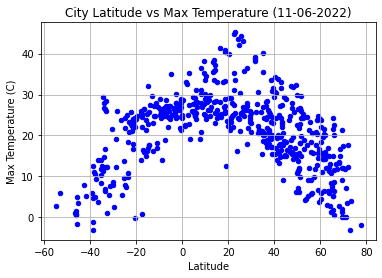

In [6]:
openweather_df.plot.scatter(x='Lat',y='Max Temp',c='blue',title=f"City Latitude vs Max Temperature ({datadate})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

The nearer the cities to the equator (Latitude near 0), the higher the temperature it has. The further to the equator, the lower the temparature.
----

## Latitude vs. Humidity Plot

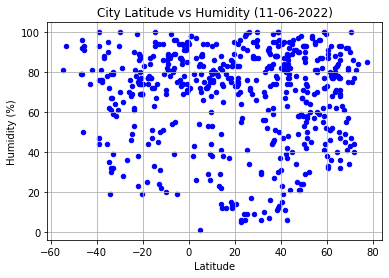

In [7]:
openweather_df.plot.scatter(x='Lat',y='Humidity',c='blue',title=f"City Latitude vs Humidity ({datadate})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

No relationship between Latitude and Humidity.
----

## Latitude vs. Cloudiness Plot

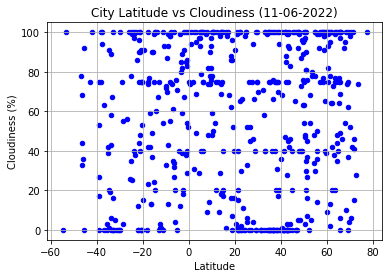

In [67]:
openweather_df.plot.scatter(x='Lat',y='Cloudiness',c='blue',title=f"City Latitude vs Cloudiness ({datadate})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

No relationship between Latitude and Cloudiness.
----

## Latitude vs. Wind Speed Plot

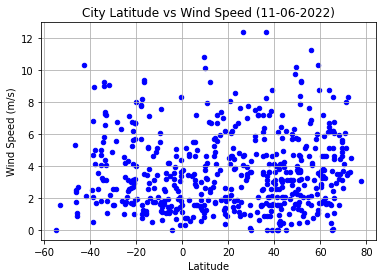

In [68]:
openweather_df.plot.scatter(x='Lat',y='Wind Speed',c='blue',title=f"City Latitude vs Wind Speed ({datadate})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

No relationship between Latitude and Wind Speed.
----

## Linear Regression

In [9]:
#make northern and southern hesmisphere dataframe
northern_hemisphere_df = openweather_df.loc[openweather_df['Lat']>=0,:]
southern_hemisphere_df = openweather_df.loc[openweather_df['Lat']<0,:]

In [79]:
    """_summary_
    This is the function to print the plot_scatter + linear regression line
    It need 5 parameter:
    hemisphere_df: dataframe of data
    x_axis: name of column in  hemisphere_df for x axis
    y_axis: name of column in  hemisphere_df for y axis
    xanno: x location for linear regression annotation
    xanno: y location for linear regression annotation
    """
#create plot scatter and linear regression line together
def plot_scatter(hemisphere_df,x_axis:str,y_axis:str,xanno,yanno):
    x_values = hemisphere_df[x_axis]
    y_values = hemisphere_df[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r value is: {rvalue}")
    hemisphere_df.plot.scatter(x=x_axis,y=y_axis,c='blue')
    plt.annotate(line_eq,(xanno,yanno),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6856511136364629


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs Max Temperature (11-06-2022)')

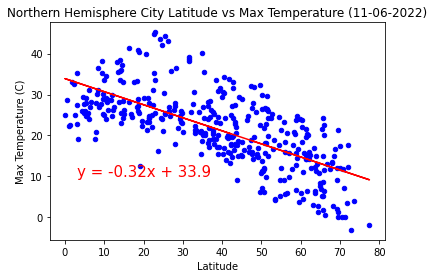

In [84]:
plot_scatter(northern_hemisphere_df,'Lat','Max Temp',3,10)
plt.ylabel('Max Temperature (C)')
plt.title(f"Northern Hemisphere City Latitude vs Max Temperature ({datadate})")

Moderate correlation between Latitude and Max Temperature. The closer to the equator, the higher the temperature.
----

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7413105166208529


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs Max Temperature (11-06-2022)')

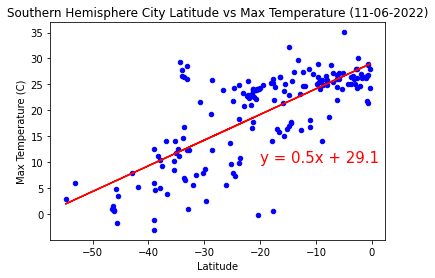

In [100]:
plot_scatter(southern_hemisphere_df,'Lat','Max Temp',-20,10)
plt.ylabel('Max Temperature (C)')
plt.title(f"Southern Hemisphere City Latitude vs Max Temperature ({datadate})")

Strong correlation between Latitude and Max Temperature. The closer to the equator, the higher the temperature.
----

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.03724248829847802


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs Humidity (11-06-2022)')

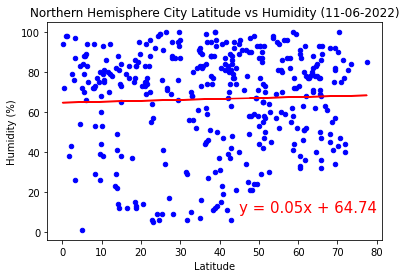

In [87]:
plot_scatter(northern_hemisphere_df,'Lat','Humidity',45,10)
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere City Latitude vs Humidity ({datadate})")

No correlation between Latitude and Humidity
----

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.11044635496955733


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs Humidity (11-06-2022)')

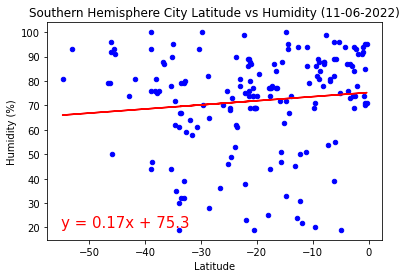

In [97]:
plot_scatter(southern_hemisphere_df,'Lat','Humidity',-55,20)
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere City Latitude vs Humidity ({datadate})")

No correlation between Latitude and Humidity
----

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.002371539271206408


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs Cloudiness (11-06-2022)')

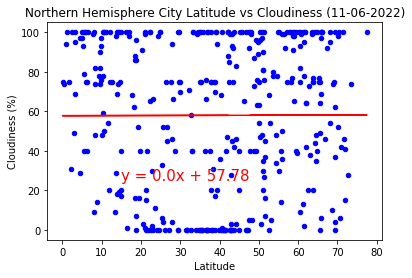

In [89]:
plot_scatter(northern_hemisphere_df,'Lat','Cloudiness',15,25)
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere City Latitude vs Cloudiness ({datadate})")

No correlation between Latitude and Cloudiness
----

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1590005955397051


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs Cloudiness (11-06-2022)')

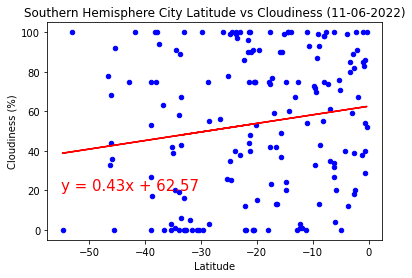

In [95]:
plot_scatter(southern_hemisphere_df,'Lat','Cloudiness',-55,20)
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere City Latitude vs Cloudiness ({datadate})")

No correlation between Latitude and Cloudiness
----

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r value is: 0.06917725570264663


Text(0.5, 1.0, 'Northern Hemisphere City Latitude vs Wind Speed (11-06-2022)')

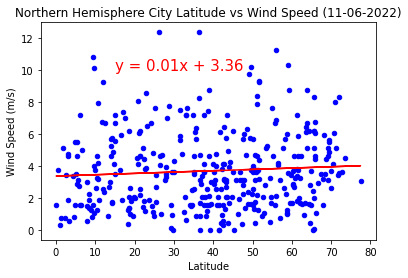

In [91]:
plot_scatter(northern_hemisphere_df,'Lat','Wind Speed',15,10)
plt.ylabel('Wind Speed (m/s)')
plt.title(f"Northern Hemisphere City Latitude vs Wind Speed ({datadate})")

No correlation between Latitude and Wind Speed
----

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r value is: -0.17945637855391583


Text(0.5, 1.0, 'Southern Hemisphere City Latitude vs Wind Speed (11-06-2022)')

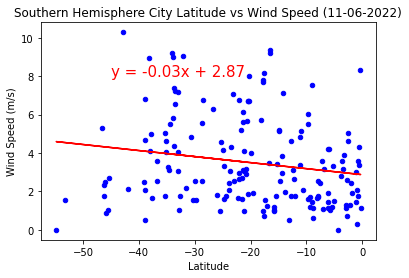

In [93]:
plot_scatter(southern_hemisphere_df,'Lat','Wind Speed',-45,8)
plt.ylabel('Wind Speed (m/s)')
plt.title(f"Southern Hemisphere City Latitude vs Wind Speed ({datadate})")

No correlation between Latitude and Wind Speed
----